#### Experiment output log record

''

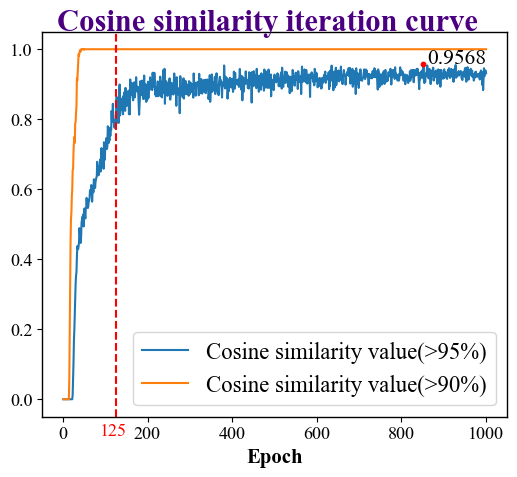

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
from scipy import interpolate
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.linewidth'] = 1  # 图框宽度#
#plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
plt.rcParams['mathtext.fontset'] = 'stix' # 公式的字体可以是这样 formula font
''''''
font = {'family': 'serif',
        'serif': 'Times New Roman', 
        'weight': 'normal',
        #'size': 10
        }
plt.rc('font', **font)

path = r'log-12-14.log' 
key_1 = 'Ramdom Train Accuracy:'
key_2 = 'Ramdom Train Accuracy (90%):'
key_3 = 'Loss:'
ramdom_train_accuracy_values_1 = []
ramdom_train_accuracy_values_2 = []
loss = []

# 读log文件
with open(path, 'r') as file:
    file_lines = file.readlines()
for line in file_lines:
    if key_1 in line:
        accuracy = float(line.split(': ')[1].strip('%\n')) / 100.0
        ramdom_train_accuracy_values_1.append(accuracy)

    if key_2 in line:
        accuracy = float(line.split(': ')[1].strip('%\n')) / 100.0
        ramdom_train_accuracy_values_2.append(accuracy)

    if key_3 in line:
        loss_values = float(line.split(', ')[1].split(': ')[1])
        loss.append(loss_values)

max_index = np.argmax(ramdom_train_accuracy_values_1)
max_data = np.max(ramdom_train_accuracy_values_1)

epoch = np.arange(1, len(ramdom_train_accuracy_values_1)+1) 
fig, ax = plt.subplots(figsize=(6,5))

# 画精度
fig.suptitle('Cosine similarity iteration curve', x = 0.5, y = 0.925, color = 'indigo', fontsize=22,fontweight='semibold')
ax.scatter(epoch[max_index],max_data, s=10,
                        marker='o', c='r',alpha=1,zorder=3)# zorder图层参数
ax.annotate(round(max_data, 5) , (epoch[max_index], max_data),
                xytext=(3, 1),textcoords='offset points',
                rotation=0,fontsize=15.5,fontweight= 'medium')
ax.plot(epoch[:1000], ramdom_train_accuracy_values_1[:1000], label= 'Cosine similarity value(>95%)')
ax.plot(epoch[:1000], ramdom_train_accuracy_values_2[:1000], label= 'Cosine similarity value(>90%)')
ax.axvline(x=125, color='red', linestyle='--', linewidth=1.5)
ax.text(150, ax.get_ylim()[0]-0.065, '125', color='red', fontsize=13, verticalalignment='bottom', horizontalalignment='right')

ax.set_xlabel("Epoch", fontsize=15,fontweight='semibold')
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(np.arange(0, 1001, step=200))
ax.legend(prop={'size':16.4},loc="lower right", labelspacing=0.5, borderpad=0.4)
#plt.savefig('accuracy.jpg', dpi=300, bbox_inches='tight')
#plt.savefig('accuracy.tif', format="tif",dpi=300,bbox_inches='tight')#,pad_inches=0.2
#plt.show()
''''''

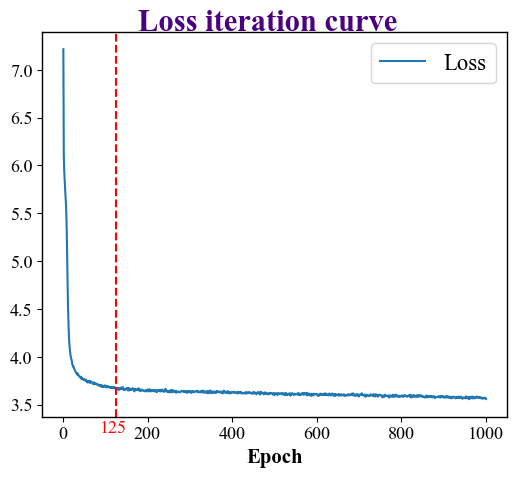

In [5]:
# 画损失
fig, ax = plt.subplots(figsize=(6,5))
fig.suptitle('Loss iteration curve', x = 0.5, y = 0.925, color = 'indigo', fontsize=22,fontweight='semibold')
ax.plot(epoch[:1000], loss[:1000], label= 'Loss')
ax.axvline(x=125, color='red', linestyle='--', linewidth=1.5)
ax.text(150, ax.get_ylim()[0]-0.2, '125', color='red', fontsize=13, verticalalignment='bottom', horizontalalignment='right')

ax.set_xlabel("Epoch", fontsize=15,fontweight='semibold')
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(np.arange(0, 1001, step=200))
ax.legend(prop={'size':16.4},loc="upper right", labelspacing=0.5, borderpad=0.4)
#plt.savefig('loss.jpg', dpi=300, bbox_inches='tight')
#plt.savefig('loss.tif', format="tif",dpi=300,bbox_inches='tight')#,pad_inches=0.2
#plt.show()